## DATA CLEANING
Data cleaning is indeed one of the most crucial steps in data analysis. 
Poor-quality data can lead to misleading insights and incorrect conclusions. 
Cleaning involves handling missing values, removing duplicates, correcting inconsistencies, and ensuring data is structured properly for analysis
To begin i will firstly 
 Import my Data set 

In [2]:
# My Data set was Downloaded from Kaggle on a Zip file
# i will unzip first 
import zipfile

zip_path = "AB_NYC_2019.csv.zip"  # Update with your actual file path
extract_to = "Oasis_InfoByte_Projects"   # Folder where files will be extracted

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete. Check the extracted folder.")


Extraction complete. Check the extracted folder.


In [3]:
import os
print(os.listdir("Oasis_InfoByte_Projects"))

['.ipynb_checkpoints', 'AB_NYC_2019.csv', 'Housing.csv']


In [4]:
import pandas as pd

# Correct file path
csv_file = "Oasis_InfoByte_Projects/AB_NYC_2019.csv"

# Read the Parquet file
data = pd.read_csv(csv_file)

# Display the first few rows
print(data.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [5]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [6]:
# checking for missing values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
data[['host_name', 'name']] = data[['host_name', 'name']].fillna("Unknown") #this code helps me remove the null values 

In [8]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# i will fill the  missing value of last_review with '2000-01-01' (placeholder date)
# and Convert last_review to datetime format
data['last_review'] = data['last_review'].fillna(pd.to_datetime("2000-01-01"))

In [10]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean()) #instead of filling my null values with 0  i filled with the mean values

In [12]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# checking for duplicates

In [14]:
print(f"Duplicates before removal: {data.duplicated().sum()}") # it shows we do not have duplicates

Duplicates before removal: 0


# Standardize Data type

In [16]:
# Convert room_type and neighbourhood to title case
data['room_type'] = data['room_type'].str.title()
data['neighbourhood'] = data['neighbourhood'].str.title()

# Standardize host_name to be capitalized
data['host_name'] = data['host_name'].str.title()

# Ensure price is numeric (remove any non-numeric characters if present)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Handling Outliers

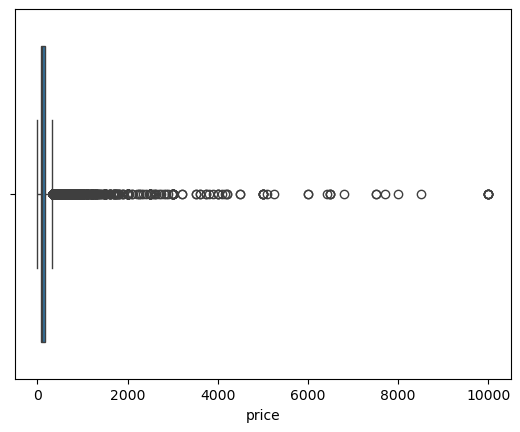

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check outliers using boxplot
sns.boxplot(x=data['price'])
plt.show()


In [19]:

# I Removed extreme outliers beyond the 99th percentile
upper_limit = data['price'].quantile(0.99)
data= data[data['price'] <= upper_limit]

# I Set minimum_nights upper limit (e.g., max 365 days)
data = data[data['minimum_nights'] <= 365]

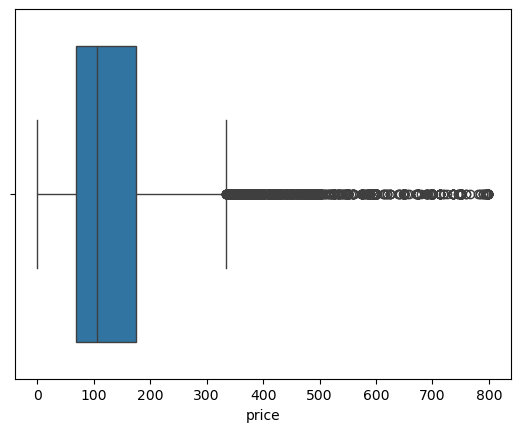

In [20]:
sns.boxplot(x=data['price'])
plt.show()

In [21]:
#now the outlierss are gone , we would move to the Data Validation

# Data validation

In [23]:
# Will Ensure latitude and longitude are within realistic ranges
data = data[(data['latitude'].between(-90, 90)) & (data['longitude'].between(-180, 180))]

# Then i Ensured room_type only contains valid values
valid_room_types = ["Entire Home/Apt", "Private Room", "Shared Room", "Hotel Room"]
data = data[data['room_type'].isin(valid_room_types)]


# Coverting Data types

In [25]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,2000-01-01 00:00:00,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private Room,70,2,0,2000-01-01 00:00:00,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private Room,40,4,0,2000-01-01 00:00:00,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire Home/Apt,115,10,0,2000-01-01 00:00:00,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell'S Kitchen,40.75751,-73.99112,Shared Room,55,1,0,2000-01-01 00:00:00,1.373221,6,2


In [26]:
data.info() # this helps me see the data types properly and know the ones to change

<class 'pandas.core.frame.DataFrame'>
Index: 48407 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48407 non-null  int64  
 1   name                            48407 non-null  object 
 2   host_id                         48407 non-null  int64  
 3   host_name                       48407 non-null  object 
 4   neighbourhood_group             48407 non-null  object 
 5   neighbourhood                   48407 non-null  object 
 6   latitude                        48407 non-null  float64
 7   longitude                       48407 non-null  float64
 8   room_type                       48407 non-null  object 
 9   price                           48407 non-null  int64  
 10  minimum_nights                  48407 non-null  int64  
 11  number_of_reviews               48407 non-null  int64  
 12  last_review                     48407

In [27]:
# Ensure availability_365 is between 0-365
data = data[(data['availability_365'] >= 0) & (data['availability_365'] <= 365)]


In [28]:
data['expected_reviews'] = data['number_of_reviews'] / (data['availability_365'] / 30 + 1)
data = data[data['reviews_per_month'] <= data['expected_reviews']]


In [29]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,expected_reviews
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19,0.21,6,365,0.683544
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21,0.38,2,355,3.506494
3,3831,Cozy Entire Floor of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-07-05,4.64,1,194,36.160714
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,2018-11-19,0.10,1,0,9.000000
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire Home/Apt,200,3,74,2019-06-22,0.59,1,129,13.962264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46532,35292625,Room-cabin in Hell's kitchen,137191484,Maria,Manhattan,Hell'S Kitchen,40.76479,-73.98667,Private Room,86,1,1,2019-06-05,0.88,5,0,1.000000
46583,35329913,Charming Brooklyn Garden apt - historic Macdon...,46724430,Mariana,Brooklyn,Bedford-Stuyvesant,40.68364,-73.92307,Entire Home/Apt,125,3,1,2019-07-01,1.00,1,0,1.000000
47175,35615687,Duplex Apartment 3 bedroom 2 bath (6 guest),145082728,Jason & Kelly,Brooklyn,Bedford-Stuyvesant,40.68091,-73.95006,Entire Home/Apt,350,2,1,2019-06-30,1.00,2,0,1.000000
47218,35642891,Beautiful room in Bushwick,268138154,Julio,Brooklyn,Bushwick,40.69640,-73.91898,Private Room,10,1,2,2019-06-18,2.00,1,0,2.000000


In [30]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
expected_reviews                  0
dtype: int64

In [31]:
data.drop(columns=['expected_reviews'], inplace=True)


In [32]:
data.rename(columns={'price': 'price_per_night'}, inplace=True)

# Reorder columns for readability
data = data[['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
         'room_type', 'price_per_night', 'minimum_nights', 'number_of_reviews', 'last_review',
         'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [33]:
data.describe()

,id,host_id,latitude,longitude,price_per_night,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.265600e+04,3.265600e+04,32656.000000,32656.000000,32656.000000,32656.000000,32656.000000,32656.000000,32656.000000,32656.000000
mean,1.568854e+07,5.004865e+07,40.728267,-73.952102,129.242804,5.748898,33.362139,1.219294,2.991365,94.504624
std,9.617145e+06,6.133751e+07,0.054640,0.044262,91.391320,14.145469,51.322247,1.546567,10.729273,121.327673
min,2.539000e+03,2.438000e+03,40.508680,-74.239860,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.309590e+06,5.904874e+06,40.688430,-73.981920,69.000000,2.000000,3.000000,0.160000,1.000000,0.000000
50%,1.598096e+07,2.292910e+07,40.721520,-73.955000,100.000000,2.000000,12.000000,0.550000,1.000000,24.000000
75%,2.307778e+07,6.990482e+07,40.763520,-73.937097,160.000000,4.000000,41.000000,1.800000,2.000000,178.000000
max,3.583255e+07,2.681382e+08,40.908040,-73.712990,799.000000,365.000000,629.000000,19.750000,327.000000,365.000000


In [62]:
data.to_csv("cleaned_airbnb_data.csv", index=False)

print("Data cleaning completed and saved successfully!")


Data cleaning completed and saved successfully!
